In [82]:
 import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\Rakesh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
p = pd.read_excel('Supply chain logisitcs problem.xlsx',sheet_name = 'OrderList')
p.head(2)


,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94


In [3]:
p.Carrier.unique()

array(['V44_3', 'V444_0', 'V444_1'], dtype=object)

In [21]:
p.groupby('Carrier').first()

,Order ID,Order Date,Origin Port,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
Carrier,,,,,,,,,,,,,
V444_0,1.447385e+09,2013-05-26,PORT09,0,DTP,0,0,V55555_4,1692724,PLANT16,PORT09,332,1.023143
V444_1,1.447312e+09,2013-05-26,PORT04,2,DTD,5,0,V55555555555555_8,1680245,PLANT12,PORT09,306,31.927536
V44_3,1.447296e+09,2013-05-26,PORT09,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000


In [5]:
p = p[::10]
p


,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000
10,1.447382e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2766,75.500000
20,1.447191e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1699336,PLANT16,PORT09,836,80.430000
30,1.447369e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1702653,PLANT16,PORT09,447,32.900000
40,1.447157e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1699337,PLANT16,PORT09,507,43.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170,1.447372e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1690627,PLANT03,PORT09,306,1.152552
9180,1.447391e+09,2013-05-26,PORT04,V444_1,1,DTD,0,0,V55555555555555_8,1690627,PLANT03,PORT09,286,0.384184
9190,1.447421e+09,2013-05-26,PORT04,V444_1,1,DTD,0,0,V55555555555555_8,1690628,PLANT03,PORT09,322,1.731004
9200,1.447287e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1690628,PLANT03,PORT09,296,1.038603


In [6]:
p.Carrier.unique()

array(['V44_3', 'V444_0', 'V444_1'], dtype=object)

In [7]:
p.Carrier.value_counts()

V444_0    626
V444_1    210
V44_3      86
Name: Carrier, dtype: int64

In [27]:
p.rename(columns={'Order ID':'order_id','Origin Port':'origin_port','Service Level':'service_level','Ship ahead day count':'Ship_ahead_day_count','Product ID':'Product_ID','Plant Code':'Plant_Code','Destination Port':'Destination_Port','Unit quantity':'Unit_quantity','Ship Late Day count':'Ship_Late_Day_count'},inplace=True)
p[:2]

,order_id,Order Date,origin_port,Carrier,TPT,service_level,Ship_ahead_day_count,Ship_Late_Day_count,Customer,Product_ID,Plant_Code,Destination_Port,Unit_quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94


# what are the order ids whose origin port and destination ports same?

In [9]:
x2=p.loc[:,['order_id','origin_port','Destination_Port']]
x2

,order_id,origin_port,Destination_Port
0,1.447296e+09,PORT09,PORT09
10,1.447382e+09,PORT09,PORT09
20,1.447191e+09,PORT09,PORT09
30,1.447369e+09,PORT09,PORT09
40,1.447157e+09,PORT09,PORT09
...,...,...,...
9170,1.447372e+09,PORT04,PORT09
9180,1.447391e+09,PORT04,PORT09
9190,1.447421e+09,PORT04,PORT09
9200,1.447287e+09,PORT04,PORT09


In [10]:
imp=x2[x2.origin_port == x2.Destination_Port]  #the order ids whose origin port and destination ports same
imp

,order_id,origin_port,Destination_Port
0,1.447296e+09,PORT09,PORT09
10,1.447382e+09,PORT09,PORT09
20,1.447191e+09,PORT09,PORT09
30,1.447369e+09,PORT09,PORT09
40,1.447157e+09,PORT09,PORT09
50,1.447233e+09,PORT09,PORT09
60,1.447320e+09,PORT09,PORT09
70,1.447139e+09,PORT09,PORT09
80,1.447155e+09,PORT09,PORT09
90,1.447179e+09,PORT09,PORT09


# WHAT ARE UNIQUE ORIGIN PORTS AND IT COUNT

In [11]:
p.origin_port.unique()

array(['PORT09', 'PORT04'], dtype=object)

In [12]:
p['origin_port'].value_counts()

PORT04    905
PORT09     17
Name: origin_port, dtype: int64

# WHAT ARE UNIQUE DESTINATION PORTS AND IT COUNT¶ 

In [13]:
p.Destination_Port.unique()

array(['PORT09'], dtype=object)

In [28]:
p.columns

Index(['order_id', 'Order Date', 'origin_port', 'Carrier', 'TPT',
       'service_level', 'Ship_ahead_day_count', 'Ship_Late_Day_count',
       'Customer', 'Product_ID', 'Plant_Code', 'Destination_Port',
       'Unit_quantity', 'Weight'],
      dtype='object')

In [29]:
p.Destination_Port.value_counts()

PORT09    9215
Name: Destination_Port, dtype: int64

# CARRIERWISE the order id,product id, quantity,Ship_ahead_day_count,weight

In [14]:
list(p.groupby('Carrier'))

[('V444_0',
            order_id Order Date origin_port Carrier  TPT service_level  \
  860   1.447154e+09 2013-05-26      PORT09  V444_0    0           DTP   
  870   1.447326e+09 2013-05-26      PORT09  V444_0    0           DTP   
  880   1.447157e+09 2013-05-26      PORT09  V444_0    0           DTP   
  890   1.447352e+09 2013-05-26      PORT04  V444_0    2           DTP   
  900   1.447186e+09 2013-05-26      PORT04  V444_0    2           DTP   
  ...            ...        ...         ...     ...  ...           ...   
  7070  1.447375e+09 2013-05-26      PORT04  V444_0    2           DTP   
  7080  1.447227e+09 2013-05-26      PORT04  V444_0    2           DTP   
  7090  1.447244e+09 2013-05-26      PORT04  V444_0    2           DTP   
  7100  1.447229e+09 2013-05-26      PORT04  V444_0    2           DTP   
  7110  1.447183e+09 2013-05-26      PORT04  V444_0    2           DTP   
  
        Ship_ahead_day_count  Ship_Late_Day_count             Customer  \
  860                  

In [15]:
ls = list(p.groupby(['Carrier','Ship_ahead_day_count']))
ls

[(('V444_0', 0),
            order_id Order Date origin_port Carrier  TPT service_level  \
  890   1.447352e+09 2013-05-26      PORT04  V444_0    2           DTP   
  900   1.447186e+09 2013-05-26      PORT04  V444_0    2           DTP   
  910   1.447227e+09 2013-05-26      PORT04  V444_0    2           DTP   
  920   1.447165e+09 2013-05-26      PORT04  V444_0    2           DTP   
  930   1.447149e+09 2013-05-26      PORT04  V444_0    2           DTP   
  ...            ...        ...         ...     ...  ...           ...   
  7050  1.447368e+09 2013-05-26      PORT04  V444_0    2           DTP   
  7060  1.447193e+09 2013-05-26      PORT04  V444_0    2           DTP   
  7070  1.447375e+09 2013-05-26      PORT04  V444_0    2           DTP   
  7080  1.447227e+09 2013-05-26      PORT04  V444_0    2           DTP   
  7090  1.447244e+09 2013-05-26      PORT04  V444_0    2           DTP   
  
        Ship_ahead_day_count  Ship_Late_Day_count             Customer  \
  890             

In [16]:
x = p[['Carrier','Ship_ahead_day_count','order_id','Product_ID','Unit_quantity','Weight']]
x

,Carrier,Ship_ahead_day_count,order_id,Product_ID,Unit_quantity,Weight
0,V44_3,3,1.447296e+09,1700106,808,14.300000
10,V44_3,3,1.447382e+09,1700106,2766,75.500000
20,V44_3,3,1.447191e+09,1699336,836,80.430000
30,V44_3,3,1.447369e+09,1702653,447,32.900000
40,V44_3,3,1.447157e+09,1699337,507,43.170000
...,...,...,...,...,...,...
9170,V444_1,5,1.447372e+09,1690627,306,1.152552
9180,V444_1,0,1.447391e+09,1690627,286,0.384184
9190,V444_1,0,1.447421e+09,1690628,322,1.731004
9200,V444_1,5,1.447287e+09,1690628,296,1.038603


In [17]:
x.Ship_ahead_day_count.value_counts()

0    443
3    320
5    148
1     11
Name: Ship_ahead_day_count, dtype: int64

In [18]:
x_zero = x.groupby('Ship_ahead_day_count').groups[0]
x_zero

Int64Index([ 140,  150,  160,  170,  180,  190,  200,  210,  220,  230,
            ...
            8320, 8410, 8630, 8720, 8790, 8870, 9080, 9090, 9180, 9190],
           dtype='int64', length=443)

# place zero ship day count to respective maximum ship day count


In [30]:
p.head(2)

,order_id,Order Date,origin_port,Carrier,TPT,service_level,Ship_ahead_day_count,Ship_Late_Day_count,Customer,Product_ID,Plant_Code,Destination_Port,Unit_quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94


<AxesSubplot:>

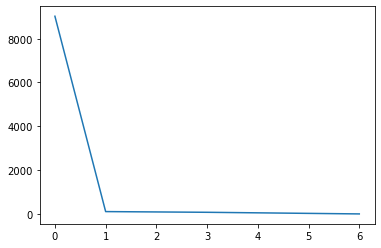

In [33]:
p.Ship_Late_Day_count.value_counts().plot()

In [38]:
x =  p[['Carrier','Ship_ahead_day_count','Ship_Late_Day_count']]
x

,Carrier,Ship_ahead_day_count,Ship_Late_Day_count
0,V44_3,3,0
1,V44_3,3,0
2,V44_3,3,0
3,V44_3,3,0
4,V44_3,3,0
...,...,...,...
9210,V444_1,5,0
9211,V444_1,5,0
9212,V444_1,5,0
9213,V444_1,5,0


In [88]:
x1=list(x.groupby(['Carrier']))
x2 = x1[0][1]
x2

,Carrier,Ship_ahead_day_count,Ship_Late_Day_count
854,V444_0,0,0
855,V444_0,0,0
856,V444_0,3,0
857,V444_0,3,0
858,V444_0,3,0
...,...,...,...
7113,V444_0,3,1
7114,V444_0,3,1
7115,V444_0,3,1
7116,V444_0,3,1


In [63]:
x1[0:9:4]

[(('V444_0', 0),
       Carrier  Ship_ahead_day_count  Ship_Late_Day_count
  854   V444_0                     0                    0
  855   V444_0                     0                    0
  888   V444_0                     0                    0
  889   V444_0                     0                    0
  890   V444_0                     0                    0
  ...      ...                   ...                  ...
  7095  V444_0                     0                    0
  7096  V444_0                     0                    0
  7097  V444_0                     0                    0
  7098  V444_0                     0                    0
  7099  V444_0                     0                    0
  
  [3192 rows x 3 columns]),
 (('V444_1', 0),
       Carrier  Ship_ahead_day_count  Ship_Late_Day_count
  7204  V444_1                     0                    0
  7205  V444_1                     0                    0
  7206  V444_1                     0                    0
  7207 

In [69]:
x3=x.groupby(['Carrier','Ship_ahead_day_count'])
x3

In [80]:
for carrier,dt in x1:
    if carrier == 'V44_3' or carrier=='V44_1' or carrier=='V44_0':
        print(dt)

    Carrier  Ship_ahead_day_count  Ship_Late_Day_count
0     V44_3                     3                    0
1     V44_3                     3                    0
2     V44_3                     3                    0
3     V44_3                     3                    0
4     V44_3                     3                    0
..      ...                   ...                  ...
849   V44_3                     0                    0
850   V44_3                     0                    0
851   V44_3                     0                    0
852   V44_3                     3                    0
853   V44_3                     3                    0

[854 rows x 3 columns]


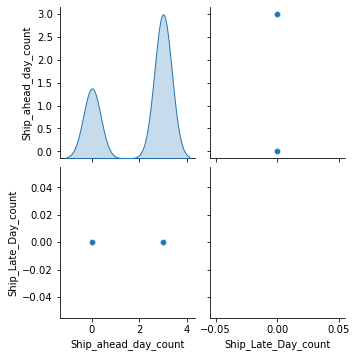

In [87]:
import seaborn as sns
sns.pairplot(data=dt,diag_kind='kde')

In [ ]:
x

# Missing data 

In [19]:
p.isna().sum()

order_id                0
Order Date              0
origin_port             0
Carrier                 0
TPT                     0
service_level           0
Ship_ahead_day_count    0
Ship_Late_Day_count     0
Customer                0
Product_ID              0
Plant_Code              0
Destination_Port        0
Unit_quantity           0
Weight                  0
dtype: int64